# Домашнее задание 3.1. Визуализация данных в Python
# 🏃‍♂️🤸‍♂️🏋️‍♀️ 


Поздравляем, ты все еще в команде популярной сети фитнес-клубов. Мы ищем точки роста на 2021 год и хотим исследовать две темы: 

1. **Тренировки**: как они распределяются во времени и по тренерам, как обстоят дела в разных клубах.
2. **Клиентов**: как их можно сегментировать, какие у них привычки.

В следующих 6 заданиях ты построишь графики — они помогут сформулировать новые гипотезы для роста нашей сети фитнес-клубов в следующем году.

Не стесняйся оставлять свои комментарии и заметки с рекомендациями для руководителя относительно данных, которые видишь на графиках. 

Для начала подключись ко всем нужным библиотекам и данным. Проверь, что данные лежат в той же папке, что этот ноутбук.

In [45]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [46]:
# загружаем данные

workouts = pd.read_csv('workouts.csv', parse_dates=['start_at'])
users = pd.read_excel('users.xlsx')

#сразу создадим новый датафрейм, в котором соединены уроки и пользователи

workouts_users =  pd.merge(workouts, users, 
                     how='left',
                     left_on='client_id', right_on='user_id')

## Задание 1

**Построй линейный график, который показывает количество тренировок за каждый день. 
Оставь комментарий — какие закономерности ты наблюдаешь.**

Как это сделать:

1. Работать будем с датафремом `workouts`.
2. Сгруппируй данные по дням, найди количество проведенных тренировок в каждый день и запиши их в переменную `trainings_by_day`.
3. Построй линейный график. Можешь добавить любые агрументы, но обязательно используй вот эти: 
    - размер графика
    - название графика 
    - подпись оси `X` 
    
    - подпись оси `Y` 
4. Удали неполные данные, которые мешают анализу.

In [47]:
workouts.head(2)
workouts.dtypes
workouts.groupby(['status'])['start_at'].count() #общее число проведенных и отклоненных треннировок

status
failed_by_client    21950
success             82743
Name: start_at, dtype: int64

In [48]:
trainings_by_day = workouts.groupby(workouts['start_at'].dt.date).size().reset_index(name='Count')

In [49]:
trainings_by_day.head(7) #число тренировок по дням

,start_at,Count
0,2020-01-01,1
1,2020-01-02,4
2,2020-01-03,5
3,2020-01-04,5
4,2020-01-05,9
5,2020-01-06,13
6,2020-01-07,8


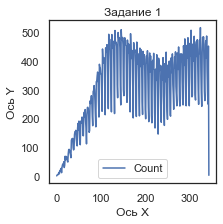

In [50]:
trainings_by_day.plot(figsize=(3,3), title='Задание 1');
plt.xlabel('Ось X')
plt.ylabel('Ось Y')
plt.show()

In [51]:
trainings_by_day[trainings_by_day['start_at'].notna()]

,start_at,Count
0,2020-01-01,1
1,2020-01-02,4
2,2020-01-03,5
3,2020-01-04,5
4,2020-01-05,9
...,...,...
338,2020-12-04,365
339,2020-12-05,292
340,2020-12-06,250
341,2020-12-07,451


In [52]:
result = trainings_by_day.dropna(how='all', axis=1) #удаляем пустые поля NaN
result

,start_at,Count
0,2020-01-01,1
1,2020-01-02,4
2,2020-01-03,5
3,2020-01-04,5
4,2020-01-05,9
...,...,...
338,2020-12-04,365
339,2020-12-05,292
340,2020-12-06,250
341,2020-12-07,451


## Задание 2

В ноябре постоянные тренеры жаловались на перегрузку. При этом,  в одних департаментах часто не хватало тренеров, а в других люди сидели без работы. 

**Построй гистограмму, которая покажет, как были распределены тренировки за ноябрь по тренерам, которые уже работали в нашей компании до 1 ноября и сделай отдельный график по каждому департаменту (всего их 7).**

Как это сделать:

1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделали:
    - отобрали тренеров, которые уже проводили тренировки до начала ноября
    - взяли тренировки, которые прошли в ноябре
    - выбрали из них те, которые провели ранее отобранные тренеры
    

2. В цикле для каждого департамента: 

    - отфильтруй по `trainer_department` тренировки нужного департамента
    - построй гистограмму распределения тренеров по количеству проведенных тренировок. Можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - задай цвет на графике
        - задай 5 столбцов
        
 

*Весь код можно написать в одной ячейке.*

**Подготовим данные**


In [53]:
#выбрали тренеров, которые вели тренировки до 1 ноября
trainers_select = workouts['trainer_id'].loc[workouts['start_at'] < '2020-11-01'] 

#множеством взяли уникальные значения
trainers_select = set(trainers_select) 

In [54]:
# взяли тренировки только за ноябрь
november_workouts = workouts.loc[workouts['start_at'].dt.month == 11] 

# берем только активных тренеров
november_workouts = november_workouts.loc[november_workouts['trainer_id'].isin(trainers_select)] 

In [55]:
#кол-во тренировок у каждого тренера
workouts_by_trainer = november_workouts.groupby(['trainer_id','trainer_department'])['workout_id'].count() 

# превращаем серию в dataframe, сбрасываем индекс
workouts_by_trainer = workouts_by_trainer.reset_index() 

# переименовываем столбец workout_id, ведь в нем теперь количество тренировок
workouts_by_trainer.columns = ['trainer_id','trainer_department','workouts'] 

workouts_by_trainer.head()

,trainer_id,trainer_department,workouts
0,1994,Spartacus,26
1,4446,Spartacus,9
2,9256,Spartacus,9
3,14431,Spartacus,11
4,15062,Spartacus,8


In [56]:
# посмотрим, какие у нас есть департаменты
departments = set(workouts_by_trainer['trainer_department'])
departments

{'Athletic',
 'Consultant',
 'Cycling',
 'Dinamo',
 'Sales',
 'Spartacus',
 'Sports Reserves'}

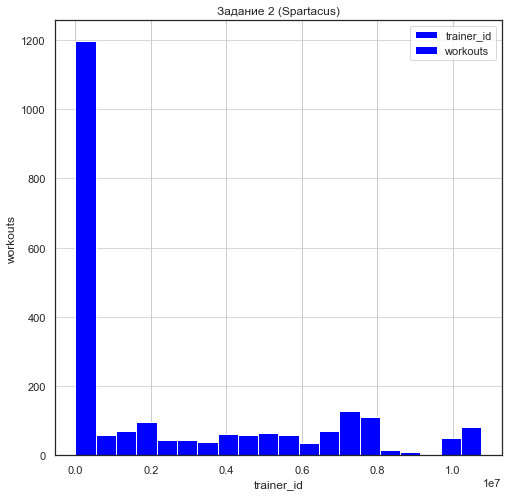

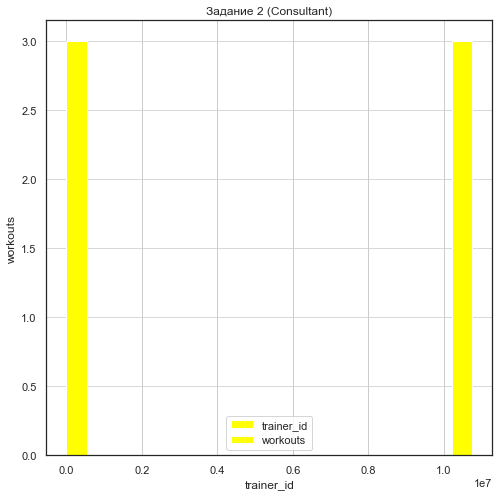

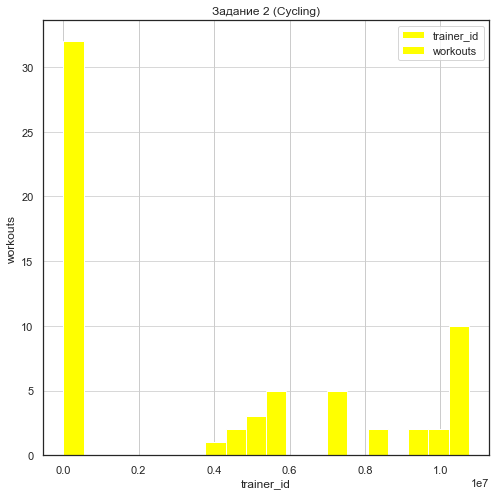

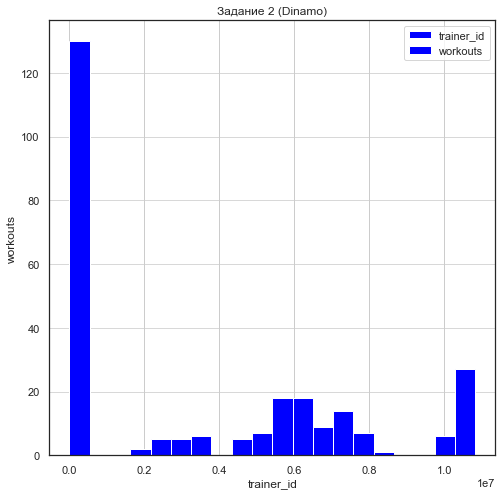

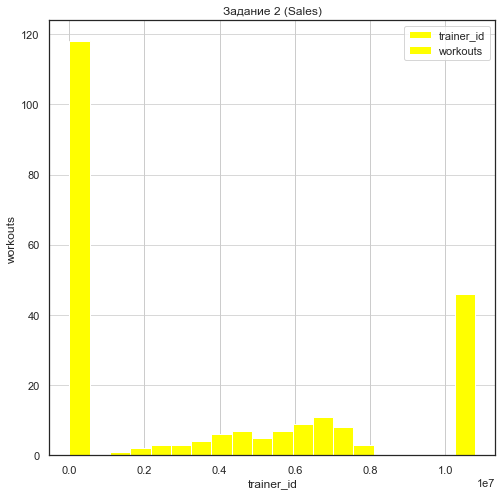

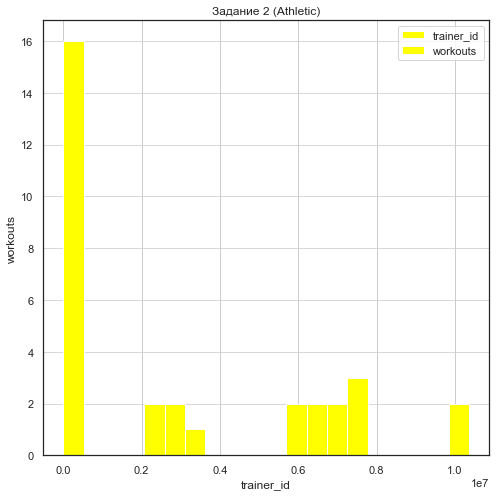

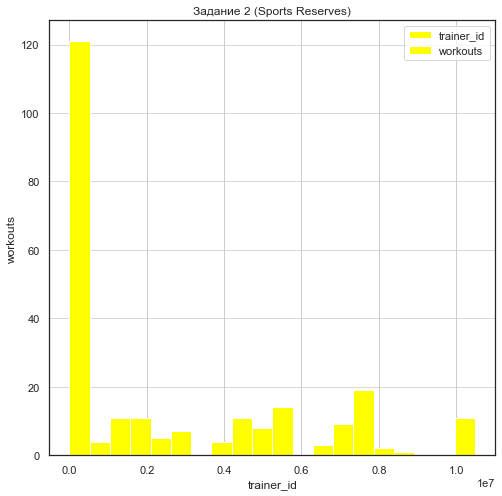

In [57]:
spar = workouts_by_trainer[workouts_by_trainer['trainer_department']=='Spartacus']
spar
spar.plot.hist(grid=True, bins=20, figsize=(8,8),
                   color='blue')
plt.title('Задание 2 (Spartacus)')
plt.xlabel('trainer_id')
plt.ylabel('workouts')
plt.grid(axis='y', alpha=0.75)
plt.legend() 
plt.show()

spar2 = workouts_by_trainer[workouts_by_trainer['trainer_department']=='Consultant']
spar2
spar2.plot.hist(grid=True, bins=20, figsize=(8,8),
                   color='yellow')
plt.title('Задание 2 (Consultant)')
plt.xlabel('trainer_id')
plt.ylabel('workouts')
plt.grid(axis='y', alpha=0.75)
plt.legend() 
plt.show()

spar3 = workouts_by_trainer[workouts_by_trainer['trainer_department']=='Cycling']
spar3
spar3.plot.hist(grid=True, bins=20, figsize=(8,8),
                   color='yellow')
plt.title('Задание 2 (Cycling)')
plt.xlabel('trainer_id')
plt.ylabel('workouts')
plt.grid(axis='y', alpha=0.75)
plt.legend() 
plt.show()

spar4 = workouts_by_trainer[workouts_by_trainer['trainer_department']=='Dinamo']
spar4
spar4.plot.hist(grid=True, bins=20, figsize=(8,8),
                   color='blue')
plt.title('Задание 2 (Dinamo)')
plt.xlabel('trainer_id')
plt.ylabel('workouts')
plt.grid(axis='y', alpha=0.75)
plt.legend() 
plt.show()

spar5 = workouts_by_trainer[workouts_by_trainer['trainer_department']=='Sales']
spar5
spar5.plot.hist(grid=True, bins=20, figsize=(8,8),
                   color='yellow')
plt.title('Задание 2 (Sales)')
plt.xlabel('trainer_id')
plt.ylabel('workouts')
plt.grid(axis='y', alpha=0.75)
plt.legend() 
plt.show()

spar6 = workouts_by_trainer[workouts_by_trainer['trainer_department']=='Athletic']
spar6
spar6.plot.hist(grid=True, bins=20, figsize=(8,8),
                   color='yellow')
plt.title('Задание 2 (Athletic)')
plt.xlabel('trainer_id')
plt.ylabel('workouts')
plt.grid(axis='y', alpha=0.75)
plt.legend() 
plt.show()

spar7 = workouts_by_trainer[workouts_by_trainer['trainer_department']=='Sports Reserves']
spar7
spar7.plot.hist(grid=True, bins=20, figsize=(8,8),
                   color='yellow')
plt.title('Задание 2 (Sports Reserves)')
plt.xlabel('trainer_id')
plt.ylabel('workouts')
plt.grid(axis='y', alpha=0.75)
plt.legend() 
plt.show()

Задание 3

Мы поняли, как тренировки распределились в каждом департаменте, но чтобы принимать какие-то решения, нужно посмотреть общую картину. Здесь нам поможет боксплот: увидим, в каких департаментах низкое среднее количество тренеровок по сравнению с остальными, и где больше перегруженных тренеров.

**Построй boxplot (один) с распределением тренеров по количеству проведенных уроков с разбивкой по департаментам.**

Как это сделать:

1. В аргументы функции, которая строит boxplot, передай: департаменты, общее количество проведенных тренерами занятий и количество тренировок у каждого тренера
2. Используй свой цвет в графике
3. Оставь комментарий: какие рекомендации можно дать по распределению нагрузки на тренеров разных департаментов, глядя на этот график

Text(0.5, 1.0, 'Пример работы с библиотекой Seaborn')

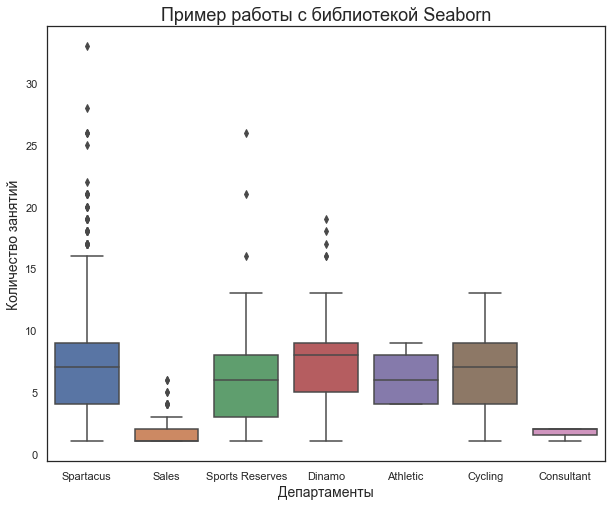

In [58]:
plt.figure(figsize=(10, 8))

sns.boxplot(x="trainer_department", y="workouts", data=workouts_by_trainer)
# Set labels and title
plt.ylabel("Количество занятий", size=14)
plt.xlabel("Департаменты", size=14)
plt.title("Пример работы с библиотекой Seaborn", size=18)
#меньше всего тренеровок в департаменте Consultant and Sales

## Задание 4


Логично, что дешевые тренировки пропускаю чаще дорогих, но мы хотим сформировать стратегию по снижению количеству пропусков, а значит нам нужны более точные данные. Для начала мы хотим посмотреть детально на корреляцию нескольких параметров с вероятностью пропусков. Возможно, это позволит нам лучше сегментировать нашу аудиторию.

Есть гипотеза, что на вероятность прогула влияет не только цена, но и возраст. Изучи этот вопрос с помощью графиков. 

**Тебе предстоит построить 3 скаттерплота в этом задании, оставь комментарий по каждому графику, видишь ли ты какие-то явные зависимости в даннных.**

1. **Внимательно изучи код, который мы подготовили, и запусти ячейки.** Что мы сделали:
    - отфильтровали только платные тренировки
    - поменяли тип данных в числовых столбцах на `int`
    - разметили столбец со статусом, успешные тренировки пометили единицей, пропущенные - нулем, чтобы высчитать долю пропусков
    - создали датафрейм, где подсчитана доля прогулов по двум параметрам: возраст и цена


2. **Построй скаттерплот, который покажет корреляцию прогулов к цене**
    - создай датафрейм, где подсчитан процент прогулов аналогично предподготовленному датафрейму `cost_age_data_agg`, но без возраста, только с ценой
    - в функцию, которая строит скаттерплот можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - задай цвет на графике
    
Подготовим данные:

In [59]:
# отфильтровали бесплатные тренировки и сделали копию датафрейма
cost_age_data = workouts_users[['status','cost','age']].loc[workouts_users.workout_schedule_type!='trial'].dropna().copy()

# Изменяем тип данных столбцов age и cost на int. Это нужно, чтобы на подписях к диаграммам числа были целыми
cost_age_data['age'] = cost_age_data['age'].apply(int) 
cost_age_data['cost'] = cost_age_data['cost'].apply(int)

# Кодируем столбец status, присваивая 1 в случаях, если он равен failed_by_client и 0 в случае success
cost_age_data['status'] = cost_age_data.status.map({'success':0,'failed_by_client':1})

# создаём агрегированные наборы данных
cost_age_data_agg = cost_age_data.groupby(['cost','age'])['status'].mean().reset_index() #считаем долю прогулов по возрасту и цене 

cost_age_data_agg

,cost,age,status
0,500,5,0.000000
1,500,6,0.500000
2,500,7,0.500000
3,500,8,0.242424
4,500,9,0.235294
...,...,...,...
185,1500,47,0.000000
186,1500,49,0.125000
187,1500,50,0.500000
188,1500,55,0.187500


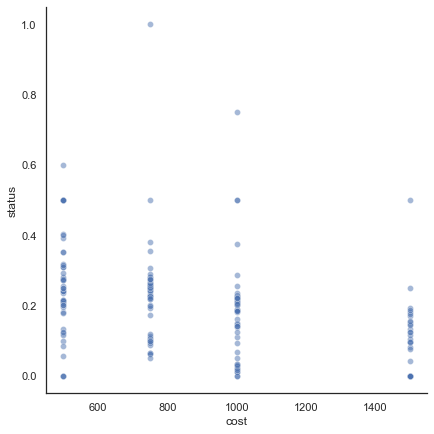

In [60]:
new = cost_age_data_agg[["cost", "status"]]

sns.set_theme(style="white")
mpg = new
sns.relplot(x="cost", y="status", sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=mpg)

4. **Построй скаттерплот, который покажет корреляцию прогулов и к возрасту и к цене одновременно**
    - создай словарь цветов цен в переменной `price_color`. Чтобы увидеть все уникальные значения, можно использовать множества
    - в функцию, которая строит скаттерплот можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - аргумент  с - цвета для разных цен
          

In [67]:
price_color = pd.Series(['red', 'green', 'blue'])
list(cost_age_data_agg.columns)
list(price_color)

['red', 'green', 'blue']

Text(0.5, 8.95999999999998, 'Корреляция')

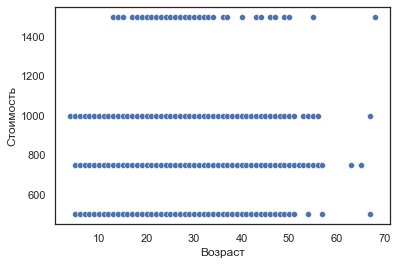

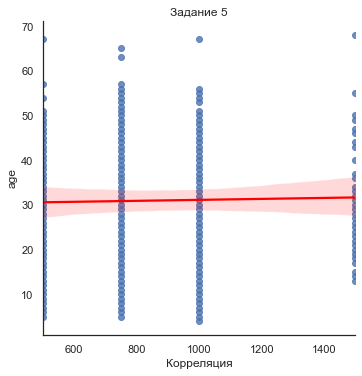

In [76]:
sns.scatterplot(data = cost_age_data_agg, x = "age", y = "cost",sizes=(400, 400))
plt.xlabel('Возраст')
plt.ylabel('Стоимость')

sns.lmplot(x="cost", y="age", data=cost_age_data_agg, line_kws={'color': 'red'});
plt.title("Задание 5")
plt.xlabel("Корреляция")


In [104]:
# пишем функцию, которая поможет разбить клиентов на возрастные группы
age = 50
def calculate_age_bins(age):
    if age <= 20:
        return '1-20'
    if age <= 25:
        return '21-25'
    if age <= 30:
        return '26-30'
    if age <= 35:
        return '31-35'
    if age <= 40:
        return '36-40'
    if age <= 45:
        return '41-45'
    if age <= 50:
        return '46-50'
    return '50+'

In [105]:
#кладем в новый столбец возрастную группу
cost_age_data['age_bin'] = cost_age_data.age.apply(calculate_age_bins)

# создаём агрегированный набор данных
cost_age_data_agg = cost_age_data.groupby(['cost','age_bin'])['status'].mean().reset_index()
cost_age_data_agg

,cost,age_bin,status
0,500,1-20,0.286578
1,500,21-25,0.283505
2,500,26-30,0.255597
3,500,31-35,0.165217
4,500,36-40,0.175573
5,500,41-45,0.191489
6,500,46-50,0.285714
7,500,50+,0.307692
8,750,1-20,0.249445
9,750,21-25,0.250124


## Задание 5

**Сделай heatmаp для кейса из задания 5.** 

1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделали:
    - написали функцию, которая в зависимости от возраста возвращает возрастную группу
    - создали новый столбец, применив функцию к столбцу возраста
    - сгруппировали данные, чтобы для каждой пары возраст-цена была сгруппирована средняя вероятность прогула
    
    
2. Создай сводную таблицу (матрицу), в которой строками будут интервалы возраста, столбцами — цена занятия, значением — доля прогулов.
3. Построй хитмап. Используй любые аргументы, но обязательно вот эти:
    - размер графика
    - название графика
    - подпись оси `X`
    
    - подпись оси `Y`
    - вывод значений в ячейках
    
4. Оставь комментарий: какие закономерности ты видишь на графике.

In [112]:
df1 = cost_age_data_agg[['cost', 'age_bin','status']]

a = df1.pivot_table(index = ['age_bin'], values = 'status',columns = 'cost')
a


cost,500,750,1000,1500
age_bin,,,,
1-20,0.286578,0.249445,0.206955,0.133663
21-25,0.283505,0.250124,0.190771,0.158784
26-30,0.255597,0.249445,0.191932,0.124706
31-35,0.165217,0.128114,0.069580,0.100313
36-40,0.175573,0.097115,0.035191,0.000000
41-45,0.191489,0.109646,0.067100,0.000000
46-50,0.285714,0.198748,0.171171,0.097561
50+,0.307692,0.296992,0.239130,0.176471


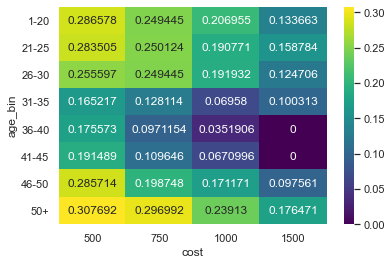

In [113]:
sns.heatmap(a, annot=True, fmt="g", cmap='viridis')
plt.show()

## EXTRA

Если остались силы, есть дополнительное задание, делать его можно по желанию. Основная его сложность в том, что нужно построить bar chart, а на занятии функцию этого графика мы не проходили. Но найти ее самостоятельно будет совсем не сложно. 

**Чтобы углубиться в данные, построй bar chart количества тренировок по дням недели (с понедельника по воскресенье) и отобрази горизонтальной линией на графике среднее количество тренировок  в день.**

Как это сделать:
1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделалаи:
    - вернули индекс внутри датафрейма
    - переименовали столбцы, чтобы они соответствовали содержимому
    - добавили столбец с номером дня недели с помощью `dt.weekday`
    
    - добавили столбец с названием дня недели с помощью `dt.day_name()`
    

2. Cгруппируй данные колонки week_day_num по workouts с подсчетом среднего.
3. Построй bar chart. Можешь добавить любые агрументы, но обязательно используй вот эти:

    - размер графика
    - название графика
    - подпись оси `X`
    
    - подпись оси `Y`
    - задай цвет на графике
    

4. Добавь горизонтальную линию со средним количеством тренировок в день.
5. Оставь комментарий, что ты видишь на графике. 

**Подготовим данные**

In [114]:
trainings_by_day # посмотрим, в каком формате лежат нужные данные

,start_at,Count
0,2020-01-01,1
1,2020-01-02,4
2,2020-01-03,5
3,2020-01-04,5
4,2020-01-05,9
...,...,...
338,2020-12-04,365
339,2020-12-05,292
340,2020-12-06,250
341,2020-12-07,451


In [120]:
trainings_by_day_frame = trainings_by_day.reset_index() # сбросим индекс


In [122]:
trainings_by_day_frame.columns=['index','workouts_date', 'workouts'] # переименуем столбцы, чтобы названия соответствовали содержимому


In [124]:
trainings_by_day_frame

,index,workouts_date,workouts
0,0,2020-01-01,1
1,1,2020-01-02,4
2,2,2020-01-03,5
3,3,2020-01-04,5
4,4,2020-01-05,9
...,...,...,...
338,338,2020-12-04,365
339,339,2020-12-05,292
340,340,2020-12-06,250
341,341,2020-12-07,451


In [128]:
trainings_by_day_frame['week_day_num'] = pd.to_datetime(trainings_by_day_frame['workouts_date'], errors='coerce').dt.weekday # добавим номер дня недели
trainings_by_day_frame['week_day_name'] = pd.to_datetime(trainings_by_day_frame['workouts_date'], errors='coerce').dt.day_name() # добавим название дня недели
trainings_by_day_frame

,index,workouts_date,workouts,week_day_num,week_day_name
0,0,2020-01-01,1,2,Wednesday
1,1,2020-01-02,4,3,Thursday
2,2,2020-01-03,5,4,Friday
3,3,2020-01-04,5,5,Saturday
4,4,2020-01-05,9,6,Sunday
...,...,...,...,...,...
338,338,2020-12-04,365,4,Friday
339,339,2020-12-05,292,5,Saturday
340,340,2020-12-06,250,6,Sunday
341,341,2020-12-07,451,0,Monday


Мы видим, что нумерация начинается с 0 до 6. Чтобы дни недели выглядели привычнее, добавим к номеру дня 1.

In [129]:
trainings_by_day_frame['week_day_num'] += 1

In [130]:
trainings_by_day_frame.groupby('week_day_num')['workouts'].mean()

week_day_num
1    366.387755
2    349.673469
3    332.857143
4    365.244898
5    304.326531
6    227.959184
7    190.142857
Name: workouts, dtype: float64

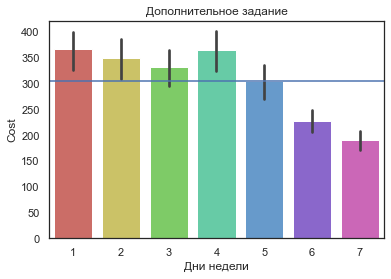

<Figure size 1152x432 with 0 Axes>

In [144]:
sns.barplot(x = 'week_day_num', y = 'workouts', data = trainings_by_day_frame,
            palette = 'hls'

        )
plt.title('Дополнительное задание')
plt.xlabel("Дни недели")
plt.ylabel("Сost")


plt.axhline(mean)
mean = trainings_by_day_frame["workouts"].mean()

plt.figure(figsize=(16, 6))
plt.show()

# 🎉🎉🎉 Поздравляем, ты великолепен! 